In [4]:
import matplotlib
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np

# Plotting ASTroCAT Model Output

In [5]:
data = xr.open_dataset('phydra_prototype_ASTroCAT_10y_x90day_timestep.nc')

In [6]:
data_coordfix = data.set_index(component = 'env__component', P__sizes='P__size', Z__sizes='Z__size')

In [7]:
P_out = data_coordfix.sel(component=['P'+str(i) for i in range(40)])
Z_out = data_coordfix.sel(component=['Z'+str(i) for i in range(40)])
N_out = data_coordfix.sel(component='N')

In [8]:
resolution = 9
resmpl_step = 50

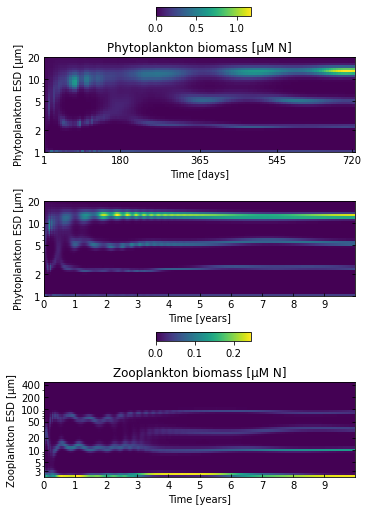

In [11]:
plt.rcParams['figure.figsize'] = [5, 7]

#f1, (ax1col, ax1, ax2, ax2col, ax3) = plt.subplots(5, 3, gridspec_kw={'height_ratios': [.1,1,1,.1,1]})#, sharey='row')

fig = plt.figure(constrained_layout=True)

gs = fig.add_gridspec(nrows=5, ncols=3,
                        hspace=0.1, wspace=0.1, height_ratios=[.1,1,1,.1,1])

ax1col = fig.add_subplot(gs[0, 1])
ax1 = fig.add_subplot(gs[1, 0:3])
ax2 = fig.add_subplot(gs[2, 0:3])
ax3col = fig.add_subplot(gs[3, 1])
ax3 = fig.add_subplot(gs[4, 0:3])


plt.setp(ax1, xticks=[1,180,365,365+180,720])
from matplotlib.ticker import MaxNLocator
for axe in [ax1]:
        axe.grid(True, alpha=0.5)
        axe.get_yaxis().set_major_locator(MaxNLocator(nbins=4))
        axe.tick_params(top=False, right=True, direction="in")

plt.setp((ax2, ax3), xticks=[1,365,2*365,3*365,4*365,5*365,6*365,7*365,8*365,9*365,10*365])
from matplotlib.ticker import MaxNLocator
for axe in (ax2, ax3):  
        axe.grid(True, alpha=0.5)
        axe.get_yaxis().set_major_locator(MaxNLocator(nbins=4))
        axe.tick_params(top=False, right=True, direction="in")
        
ax1.set_title('Phytoplankton biomass [µM N]')
ax1plt = ax1.pcolormesh(P_out.time[:365*2*resolution:resmpl_step],P_out.P__sizes,
               P_out.env__stateout[:365*2*resolution:resmpl_step].T)
ax1plt
ax1.set_yscale('log')
ax1.set_yticks([1,2,5,10,20])
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.colorbar(ax1plt,cax=ax1col, orientation='horizontal')
ax1.set_ylabel('Phytoplankton ESD [µm]')
ax1.set_xlabel('Time [days]')
    
ax2.pcolormesh(P_out.time[::resolution],P_out.P__sizes,P_out.env__stateout[::resolution].T)
ax2.set_yscale('log')
ax2.set_yticks([1,2,5,10,20])
ax2.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax2.set_ylabel('Phytoplankton ESD [µm]')
ax2.set_xlabel('Time [years]')
ax2.set_xticklabels(labels=[i for i in range(0,10)])

ax3.set_title('Zooplankton biomass [µM N]')
ax3plt = ax3.pcolormesh(Z_out.time[::resolution],Z_out.Z__sizes,Z_out.env__stateout[::resolution].T)
ax3plt
ax3.set_yscale('log')
ax3.set_yticks([3,5,10,20,50,100,200,400])
ax3.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.colorbar(ax3plt, cax=ax3col, orientation='horizontal')
ax3.set_ylabel('Zooplankton ESD [µm]')
ax3.set_xlabel('Time [years]')
ax3.set_xticklabels(labels=[i for i in range(0,10)])

# Defining custom 'xlim' and 'ylim' values.
xlim = (0, 365*9+364)

# Setting the values for all axes.
plt.setp((ax2, ax3), xlim=xlim)

#f1.align_ylabels()


plt.savefig('ASTroCAT_out.pdf', bbox_inches='tight')
plt.show()